# Analysis of Economic Activity of Night images from Black Marble site(Supplied by NTT DATA)


We have been provided Images from the Black Marble website 
https://ladsweb.modaps.eosdis.nasa.gov/missions-and-measurements/science-domain/nighttime-lights/

These are night time images over a period and we are attempting to map the light intensities so we can use the intensities to understand where we have night lights and what is the difference over each day. This can be used to understand Econmic activities

In [1]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
import cv2

In [2]:
data = np.load("/kaggle/input/ntt-data-global-ai-challenge-06-2020/NTL-dataset/npy/East_China.npy")

Here we are just Viewing the Images from a NPY file. We have chosen East China images from the lot shared by NTT team

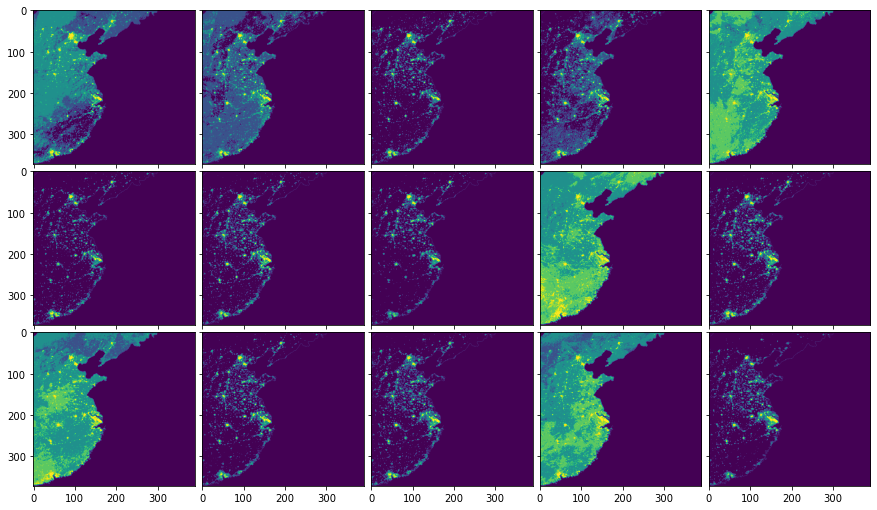

In [3]:
fig = plt.figure(figsize=(15., 15.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, range(15)):
    # Iterating over the grid returns the Axes.
    ax.imshow(data[im].astype(np.uint8))

We have set a Threshold and now we are mapping white lights in a data frame

In [4]:
data.shape

(15, 372, 391)

In [5]:
whiteintensitythreshold = 230
numwhitethreshold = 70
interestingregions = pd.DataFrame([(i, j, numwhite) for i, j, numwhite in 
           ((i,j, np.sum(data[0, i:(i+30), j:(j+31)]>whiteintensitythreshold)) 
              for i in range(data.shape[1]-30) for j in range(data.shape[2]-31)) if numwhite>numwhitethreshold], 
                                  columns=["i","j", "numwhite"])

We are now using cluster analysis to mark the higher intensity spots in the map

In [6]:
from sklearn.cluster import OPTICS
clustering = OPTICS(min_samples=50).fit(interestingregions[["i", "j"]])
print(set(clustering.labels_))
interestingregions["clusid"] = clustering.labels_

{0, 1, 2, 3}


In [7]:
interestingregions.loc[interestingregions.groupby(["clusid"])["numwhite"].idxmax()]

,i,j,numwhite,clusid
49,24,170,76,0
755,52,76,226,1
2183,208,135,166,2
3021,327,37,179,3


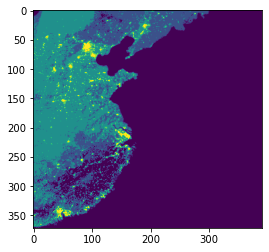

In [8]:
plt.imshow(data[0].astype(np.uint8))

We are now marking the spots with higher intensity in the map so we can compare with other maps

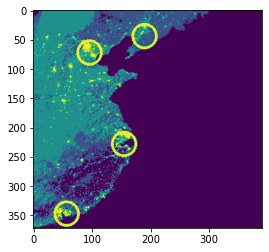

In [9]:

for idx, row in interestingregions.loc[interestingregions.groupby(["clusid"])["numwhite"].idxmax()].iterrows():
    cX = int(row["i"]+20)
    cY = int(row["j"]+20)
    radius = 20
    cv2.circle(data[0], (int(cY), int(cX)), int(radius), (255, 255,  0), 3)
    
plt.imshow(data[0].astype(np.uint8))